In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

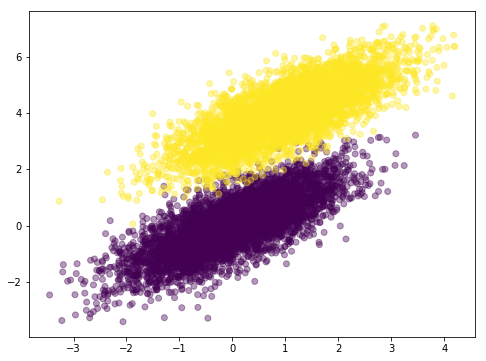

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

In [4]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [5]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [6]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with log likelihood gradient
        output_error_signal = target - predictions
        
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
    return weights

In [7]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 50000, learning_rate = 5e-5, add_intercept=True)

-4346.264779152365
-148.7067227680535
-142.9649362310784
-141.5453030715737
-141.06031965930796


In [8]:
print (weights)

[-13.58690551  -4.8809644    7.99812915]
